In [111]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Unifild csv files\netflix1.csv")
df 

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   listed_in     8790 non-null   object        
 9   year_added    8790 non-null   int32         
 10  month_added   8790 non-null   int32         
 11  genres        8790 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 755.5+ KB


In [127]:
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))

In [7]:
df.drop(columns="show_id",inplace=True)

In [8]:
 df.dropna(subset=['director', 'rating',
 'country'],inplace=True)

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [49]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   listed_in     8790 non-null   object        
 9   year_added    8790 non-null   int32         
 10  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 686.8+ KB


In [53]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,[Documentaries]
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,"[Crime TV Shows, International TV Shows, TV ..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,"[TV Dramas, TV Horror, TV Mysteries]"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,"[Children & Family Movies, Comedies]"
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,"[Dramas, Independent Movies, International M..."


In [11]:
type_count = df["type"].value_counts()
print(type_count)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


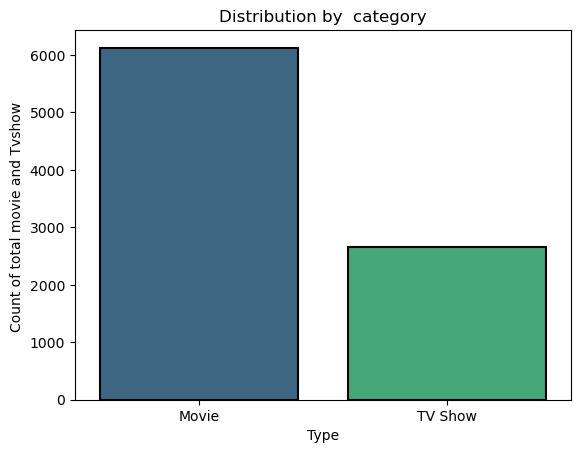

In [12]:
sns.barplot(x = type_count.index, y = type_count.values , palette='viridis'  ,  edgecolor='black', linewidth=1.5,legend=False ) 
plt.title("Distribution by  category")
plt.ylabel("Count of total movie and Tvshow ")
plt.xlabel("Type")
plt.show()

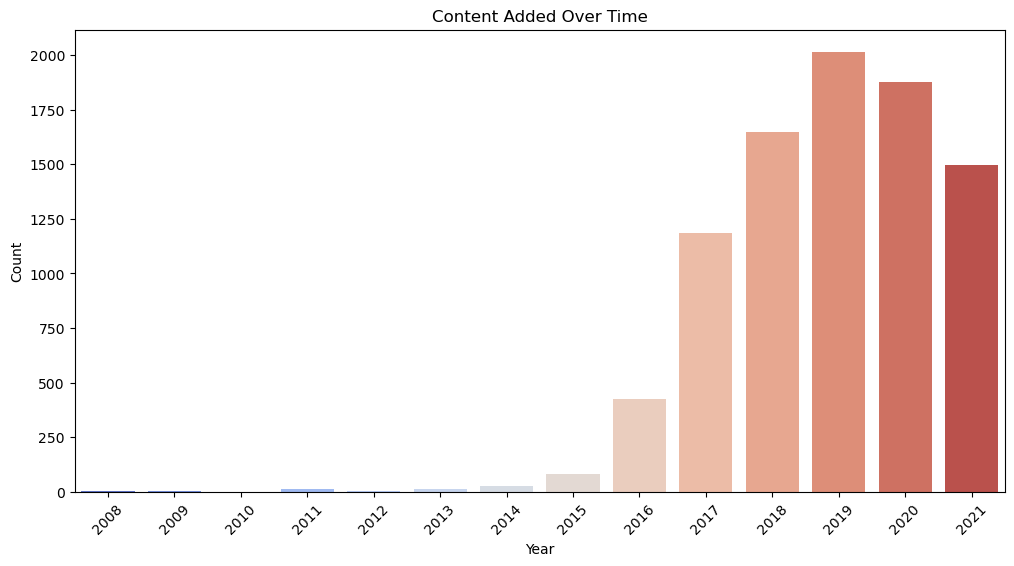

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
top_directors = df['director'].value_counts().head(10)
print(top_directors)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64


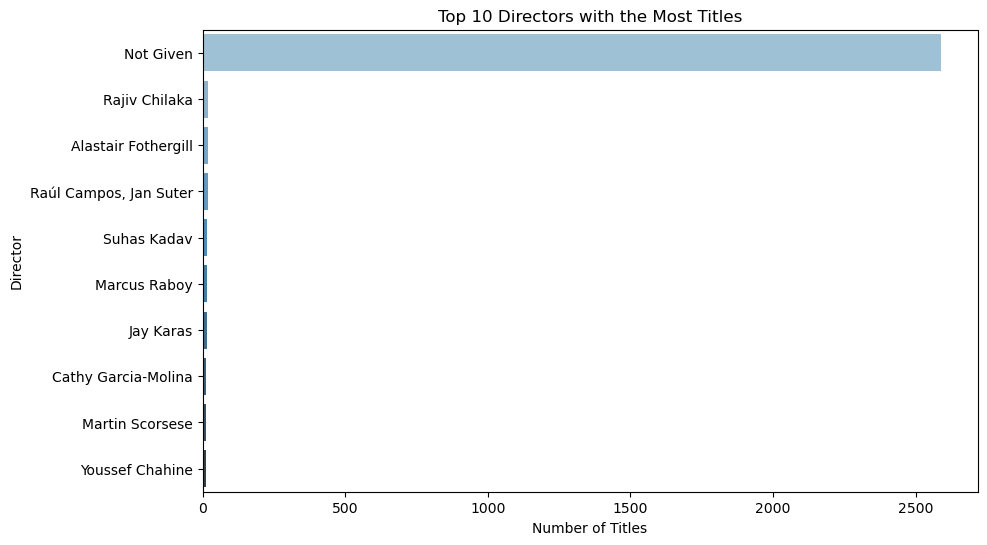

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values,palette='Blues_d',y=top_directors.index)

plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [45]:
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud=WordCloud(width=800,height=400,background_color='black').generate(' '.join(movie_titles))

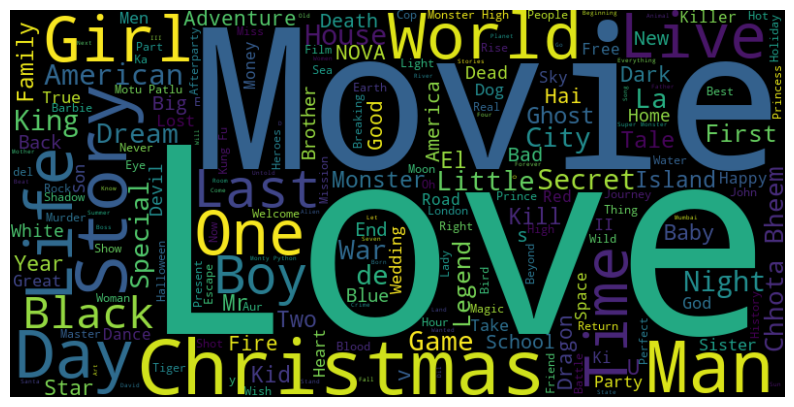

In [47]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


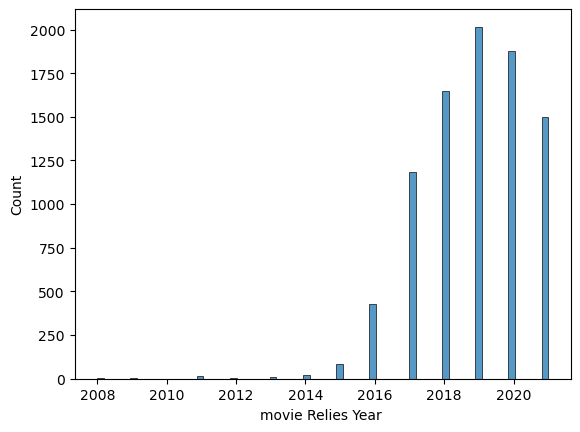

In [61]:
sns.histplot(data=df,x="year_added",palette='Blues_d')
plt.xlabel('movie Relies Year ')
plt.ylabel('Count')
plt.show()

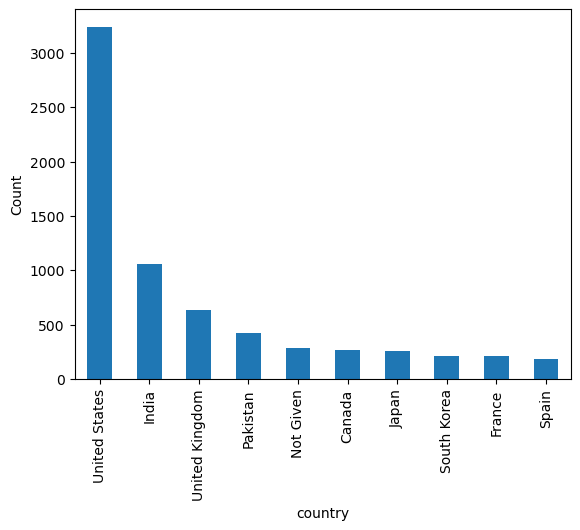

In [71]:
top_10_country = df.country.value_counts()
top_10_country[:10].plot(kind = 'bar')
plt.xlabel("country")
plt.ylabel("Count")
plt.show()

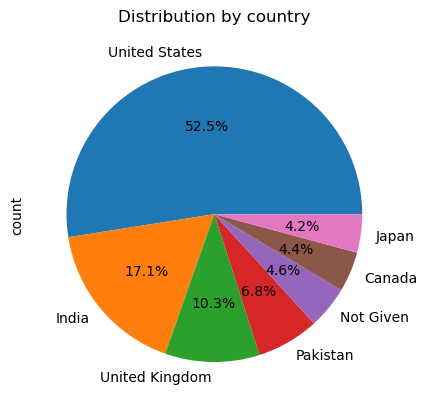

In [79]:
data_country = df.country.value_counts()
data_country[:7].plot(kind = 'pie',autopct ='%1.1f%%',)
plt.title("Distribution by country")
plt.show()

In [83]:

df.rating.value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

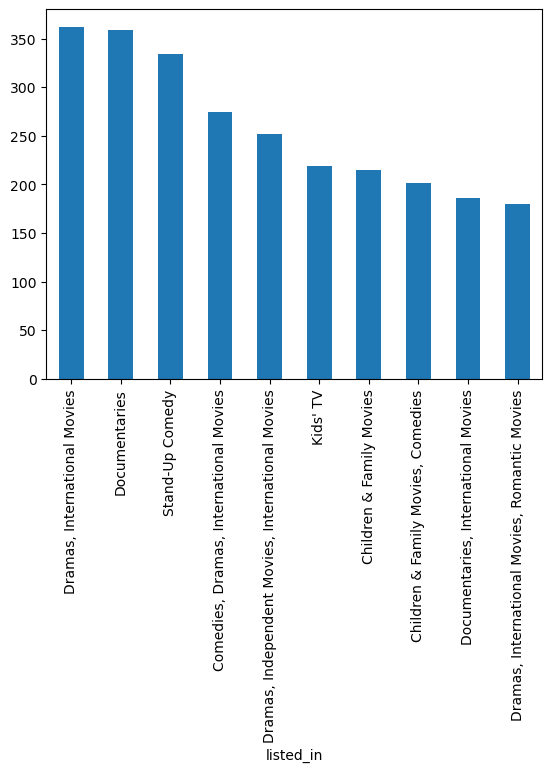

In [95]:
top_10_types = df.listed_in.value_counts()
top_10_types[:10].plot(kind = 'bar')
plt.show()

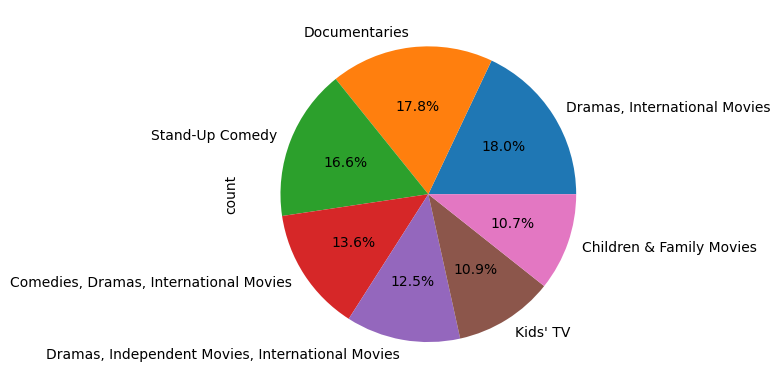

In [93]:
data_list= df.listed_in.value_counts()
data_list[:7].plot(kind = 'pie',autopct ='%1.1f%%')
plt.show()

In [103]:
def convert_duration(val):
    if 'min' in val:
        return int(val.replace('min', '').strip())
    elif 'Season' in val:
        return int(val.split()[0]) * 60  # Rough conversion for shows
    else:
        return np.nan
df['duration_mins'] = df['duration'].apply(convert_duration)

In [105]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

In [113]:
df['duration_mins'].fillna(df['duration_mins'].median(), inplace=True)
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['country'].astype(str))

In [137]:
X = df[['duration_mins', 'num_genres', 'country_encoded']]
y = df['type_encoded']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)*100
print(f" ML Model Accuracy: {accuracy:.2f}")

 ML Model Accuracy: 99.09


***ML Model Accuracy: 99.09***